# Import Libraries

In [1]:
# OTHERS
import os
from datetime import datetime



# PANDAS LIBRARIES
from pandas import read_csv
from pandas import to_datetime



# NUMPY LIBRARIES
import numpy as np



# PLOTLY LIBRARIES
from plotly import graph_objs
from plotly.offline import init_notebook_mode
from plotly.offline import iplot



# MATPLOTLIB LIBRARIES
from matplotlib import pyplot



# SNS LIBRARIES
from seaborn import distplot
from seaborn import heatmap

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4



# Initialize dataset-directory and file-names

## &nbsp;&nbsp;- set dataset directory name

In [16]:
dataset_directory = "datasets/01 aep/"

## - set dataset storage directory name

In [17]:
datetimenow = datetime.now()
file_hour   = str(datetimenow.hour).zfill(2)
file_minute = str(datetimenow.minute).zfill(2)
file_second = str(datetimenow.second).zfill(2)
file_store_data_prefix = "{:}_{:}_{:} ".format(file_hour, file_minute, file_second)
print ("\n\"{:}\" will be used as a prefix for the train, train features, train targets, test data filenames.\n".format(file_store_data_prefix))


"20_32_41 " will be used as a prefix for the train, train features, train targets, test data filenames.



## - functions

In [18]:
def price2num(x):
    if type(x) == str: 
        x = x.strip("$").replace(",", "")
    return float(x)

## - defining whether time-series (TS) or not-time-series (NTS) data

In [64]:
is_data_time_series = True

In [65]:
tmp_n_splits = 0
if (is_data_time_series):
    tmp_n_splits = 2
    print ("\nThere will be {:} number of splits used in time-series experimentation!\n".format(tmp_n_splits))


There will be 2 number of splits used in time-series experimentation!



## - set dataset train, train features, train targets, and test data filenames

In [66]:
postfix_ts_nts = ""

# for time-series only
dataset_train_files          = []
dataset_train_features_files = []
dataset_train_targets_files  = []
dataset_test_files           = []

dataset_original_file = "{:}00 original.csv".format(dataset_directory)

if (is_data_time_series):
    print ("\nDefine file names for time-series (ts)!\n")
    postfix_ts_nts = " ts"
    
    for tmp_i in range(1, tmp_n_splits+1):
        dataset_train_file          = "{:}01 a train{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
        dataset_train_features_file = "{:}01 b train features{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
        dataset_train_targets_file  = "{:}01 c train targets{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
        dataset_test_file           = "{:}01 d test{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
        
        dataset_train_files.append(dataset_train_file)
        dataset_train_features_files.append(dataset_train_features_file)
        dataset_train_targets_files.append(dataset_train_targets_file)
        dataset_test_files.append(dataset_test_file)

else:
    print ("\nDefined file names for non-time-series (nts)!\n")
    postfix_ts_nts = " nts"

    dataset_train_file          = "{:}01 a train{:}.csv".format(dataset_directory, postfix_ts_nts)
    dataset_train_features_file = "{:}01 b train features{:}.csv".format(dataset_directory, postfix_ts_nts)
    dataset_train_targets_file  = "{:}01 c train targets{:}.csv".format(dataset_directory, postfix_ts_nts)
    dataset_test_file           = "{:}01 d test{:}.csv".format(dataset_directory, postfix_ts_nts)


Define file names for time-series (ts)!



In [63]:
dataset_test_file

'datasets/01 aep/01 d test nts.csv'

## - set dataset storage directory name

In [33]:
datenow = datetime.now().date()
folder_year = str(datenow.year)
folder_month = str(datenow.month).zfill(2)
folder_day = str(datenow.day).zfill(2)
folder_store_data = "{:}_{:}_{:}/".format(folder_year, folder_month, folder_day)
dataset_directory_store   = "{:}{:}".format(dataset_directory, folder_store_data)
print ("\n\"{:}\" folder will be used for storing the train, train features, train targets, test data.\n".format(dataset_directory_store))


"datasets/01 aep/2022_11_08/" folder will be used for storing the train, train features, train targets, test data.



## &nbsp;&nbsp;- create dataset scaled directory

In [34]:
os.makedirs(dataset_directory_store, exist_ok=True)
print ("\n\"{:}\" directory is available now. We will store the train, train features, train targets, test data in this directory.\n".format(dataset_directory_store))


"datasets/01 aep/2022_11_08/" directory is available now. We will store the train, train features, train targets, test data in this directory.



# 1. Load the Dataset, Train, Train features, Train targets, and Test data

In [35]:
data_original = read_csv(dataset_original_file)

train        = read_csv(dataset_train_files[0])
test         = read_csv(dataset_test_files[0])
feature_vars = read_csv(dataset_train_features_files[0])
target_vars  = read_csv(dataset_train_targets_files[0])

# 2. Analyzing the dataset

## - plot settings

In [36]:
init_notebook_mode(connected=True)

In [37]:
color_monthly = "#036bfc"
color_weekly  = "#fc9003"
color_weekday = color_weekly
color_weekend = "#3a8f38"

color_histogram            = color_monthly
color_distribution_inputs  = "#f0b907"
color_distribution_outputs = "#1ed46d"

## - plotting overall pattern of appliance energy consumption

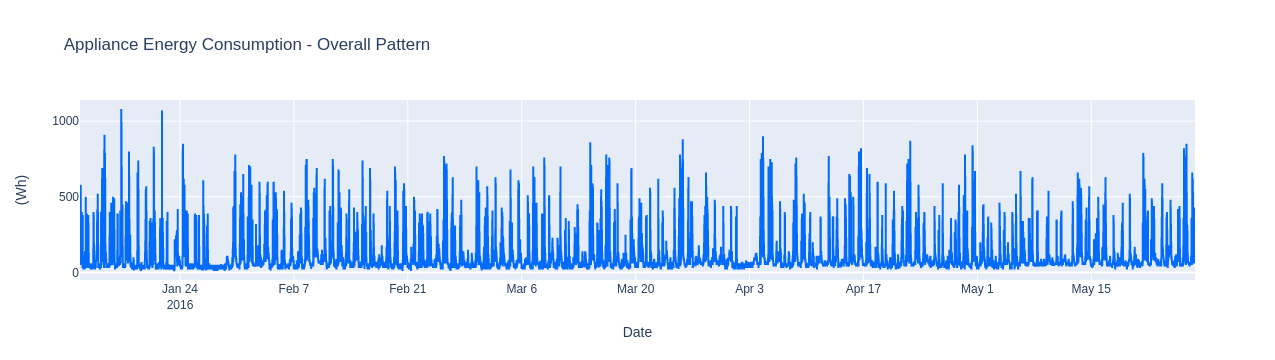

In [38]:
# To understand the timeseries variation of the applaince energy consumption
visData = graph_objs.Scatter(
    x = data_original.date,
    y = data_original.Appliances,
    mode = "lines",
    line_color=color_monthly
)
layout = graph_objs.Layout(
    title = "Appliance Energy Consumption - Overall Pattern",
    xaxis = dict(title = "Date"),
    yaxis = dict(title = "(Wh)")
)
fig = graph_objs.Figure(
    data = [visData],
    layout = layout
)
iplot(fig)

## - plotting overall weekday pattern of appliance energy consumption

In [39]:
data_original["WEEKDAY"] = (
    (to_datetime(data_original["date"]).dt.dayofweek)// 5 == 1
).astype(float)
data_original["WEEKDAY"].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

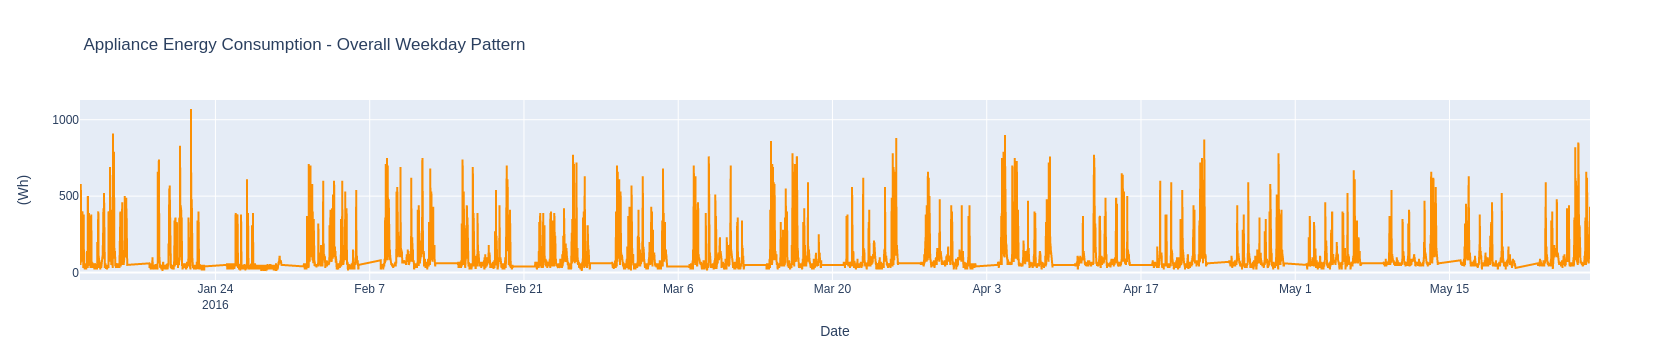

In [40]:
temp_weekday =  data_original[data_original["WEEKDAY"] == 0].copy(deep=True)
visData = graph_objs.Scatter(
    x = temp_weekday.date,
    y = temp_weekday.Appliances,
    mode = "lines",
    line_color=color_weekday
)
layout = graph_objs.Layout(
    title = "Appliance Energy Consumption - Overall Weekday Pattern",
    xaxis = dict(title = "Date"),
    yaxis = dict(title = "(Wh)")
)
fig = graph_objs.Figure(
    data = [visData],
    layout=layout
)
iplot(fig)

## - plotting overall weekend pattern of appliance energy consumption

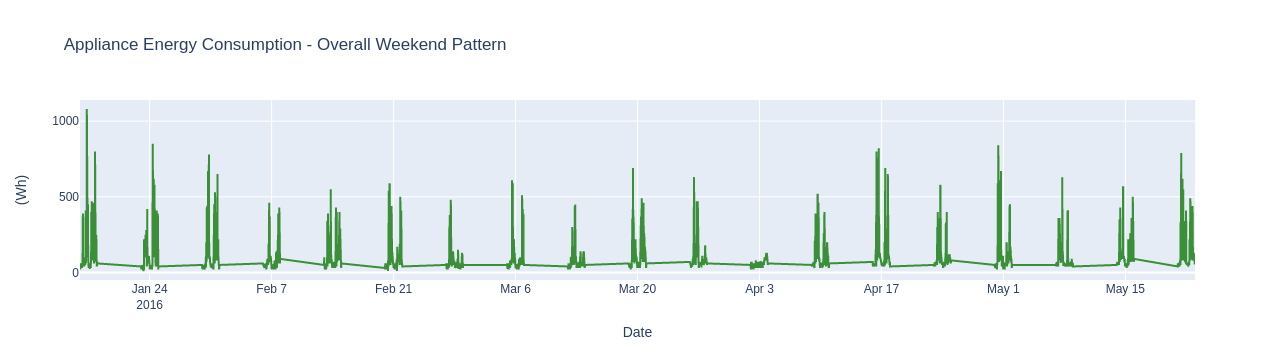

In [41]:
temp_weekend =  data_original[data_original["WEEKDAY"] == 1].copy(deep=True)
visData = graph_objs.Scatter(
    x = temp_weekend.date,
    y = temp_weekend.Appliances,
    mode = "lines",
    line_color=color_weekend
)
layout = graph_objs.Layout(
    title = "Appliance Energy Consumption - Overall Weekend Pattern",
    xaxis = dict(title = "Date"),
    yaxis = dict(title = "(Wh)")
)
fig = graph_objs.Figure(
    data = [visData],
    layout=layout
)
iplot(fig)

## - plotting histogram of all the features to understand the distribution

array([[<AxesSubplot: title={'center': 'T1'}>,
        <AxesSubplot: title={'center': 'RH_1'}>,
        <AxesSubplot: title={'center': 'T2'}>,
        <AxesSubplot: title={'center': 'RH_2'}>,
        <AxesSubplot: title={'center': 'T3'}>],
       [<AxesSubplot: title={'center': 'RH_3'}>,
        <AxesSubplot: title={'center': 'T4'}>,
        <AxesSubplot: title={'center': 'RH_4'}>,
        <AxesSubplot: title={'center': 'T5'}>,
        <AxesSubplot: title={'center': 'RH_5'}>],
       [<AxesSubplot: title={'center': 'T6'}>,
        <AxesSubplot: title={'center': 'RH_6'}>,
        <AxesSubplot: title={'center': 'T7'}>,
        <AxesSubplot: title={'center': 'RH_7'}>,
        <AxesSubplot: title={'center': 'T8'}>],
       [<AxesSubplot: title={'center': 'RH_8'}>,
        <AxesSubplot: title={'center': 'T9'}>,
        <AxesSubplot: title={'center': 'RH_9'}>,
        <AxesSubplot: title={'center': 'T_out'}>,
        <AxesSubplot: title={'center': 'Press_mm_hg'}>],
       [<AxesSubplot: titl

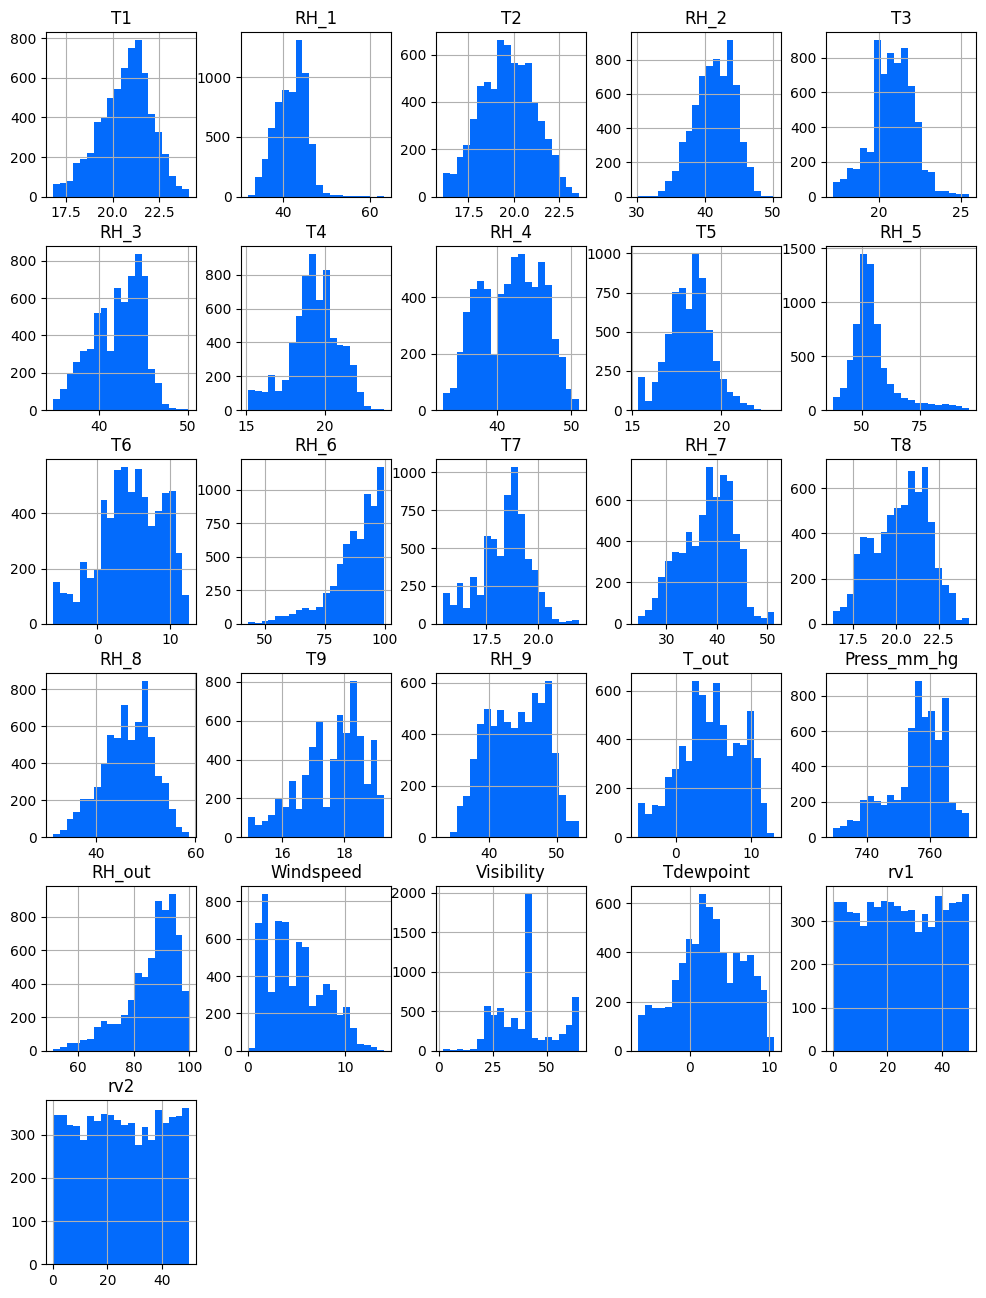

In [42]:
feature_vars.hist(
    bins = 20,
    figsize= (12, 16),
    color = color_monthly
)

## - plotting irregular distributions of RH_6, RH_out, Visibility, Windspeed

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function

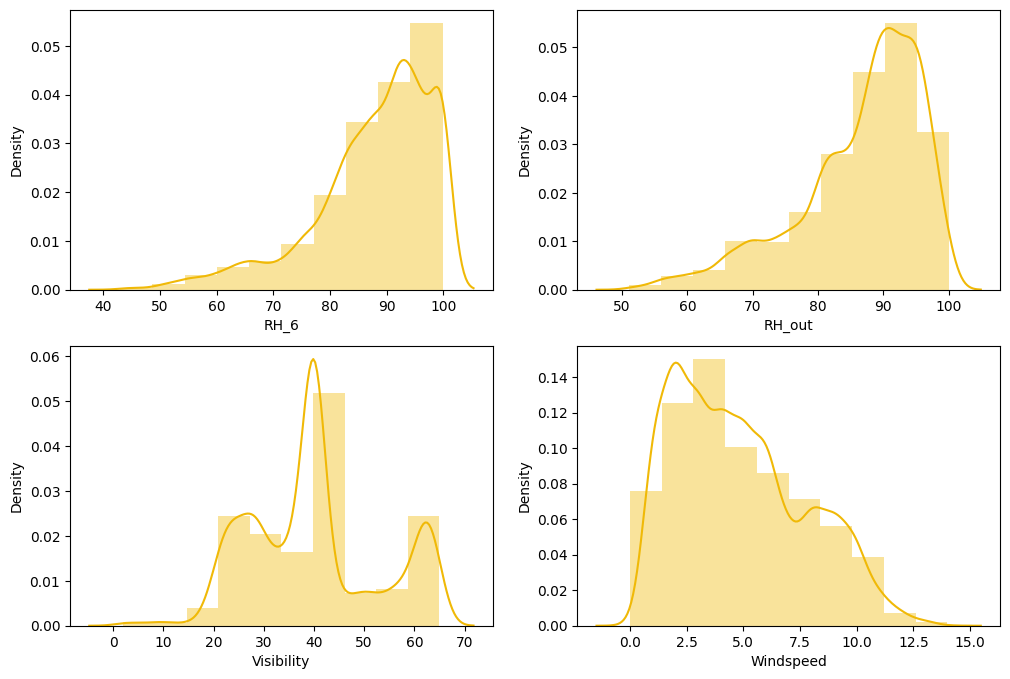

In [43]:
f, ax = pyplot.subplots(
    2, #rows
    2, #columns
    figsize=(12, 8)
)
vis1 = distplot(
    feature_vars["RH_6"],
    bins = 10,
    ax = ax[0][0],
    color = color_distribution_inputs
)
vis2 = distplot(
    feature_vars["RH_out"],
    bins = 10,
    ax = ax[0][1],
    color = color_distribution_inputs
)
vis3 = distplot(
    feature_vars["Visibility"],
    bins = 10,
    ax = ax[1][0],
    color = color_distribution_inputs
)
vis4 = distplot(
    feature_vars["Windspeed"],
    bins = 10,
    ax = ax[1][1],
    color = color_distribution_inputs
)

## - plotting distributions of Appliances

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot: xlabel='Appliance Energy Consumption in Wh', ylabel='Frequency'>

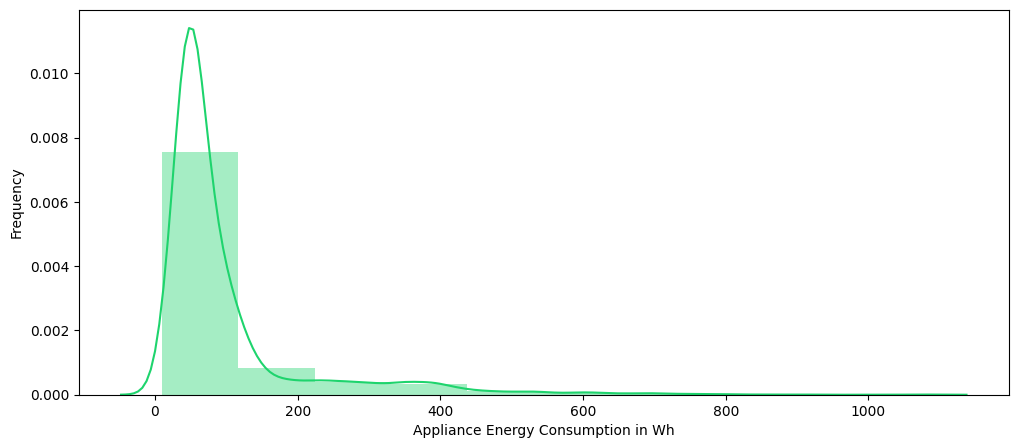

In [44]:
f = pyplot.figure(figsize=(12,5))
pyplot.xlabel("Appliance Energy Consumption in Wh")
pyplot.ylabel("Frequency")
distplot(
    target_vars,
    bins = 10,
    color = color_distribution_outputs
)

## - preprocessing 'Appliance' column range with consumption less than 200 Wh

In [45]:
maximum_energy_consumption = 200
percentage_energy_consumption_less_than_max = (
    ((target_vars[target_vars <= maximum_energy_consumption].count()) / (len(target_vars))*100)
).Appliances
print("\nPercentage of the Appliance Energy Consumption having having less than {:} Wh is \"{:.2f} %\"\n".format(
    maximum_energy_consumption,
    percentage_energy_consumption_less_than_max
))


Percentage of the Appliance Energy Consumption having having less than 200 Wh is "88.77 %"



## - plotting correlation graph for comparison of targets relationship with features

In [46]:
cols_train_corr = list(feature_vars.columns)
cols_train_corr.remove("date")
for col in target_vars.columns:
    cols_train_corr.append(col)

num_cols_train_corr = len(cols_train_corr)
num_cols_train_corr_in_row = 7
print (
    "\nCorrelation Plot Columns: {:}".format(num_cols_train_corr)
)
for i in range(0, num_cols_train_corr, num_cols_train_corr_in_row):
    print (" - ", ", ".join(["\"{:}\"".format(i) for i in cols_train_corr[i:i+num_cols_train_corr_in_row]]))
print ("")


Correlation Plot Columns: 27
 -  "T1", "RH_1", "T2", "RH_2", "T3", "RH_3", "T4"
 -  "RH_4", "T5", "RH_5", "T6", "RH_6", "T7", "RH_7"
 -  "T8", "RH_8", "T9", "RH_9", "T_out", "Press_mm_hg", "RH_out"
 -  "Windspeed", "Visibility", "Tdewpoint", "rv1", "rv2", "Appliances"



/tmp/ipykernel_216023/794794142.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



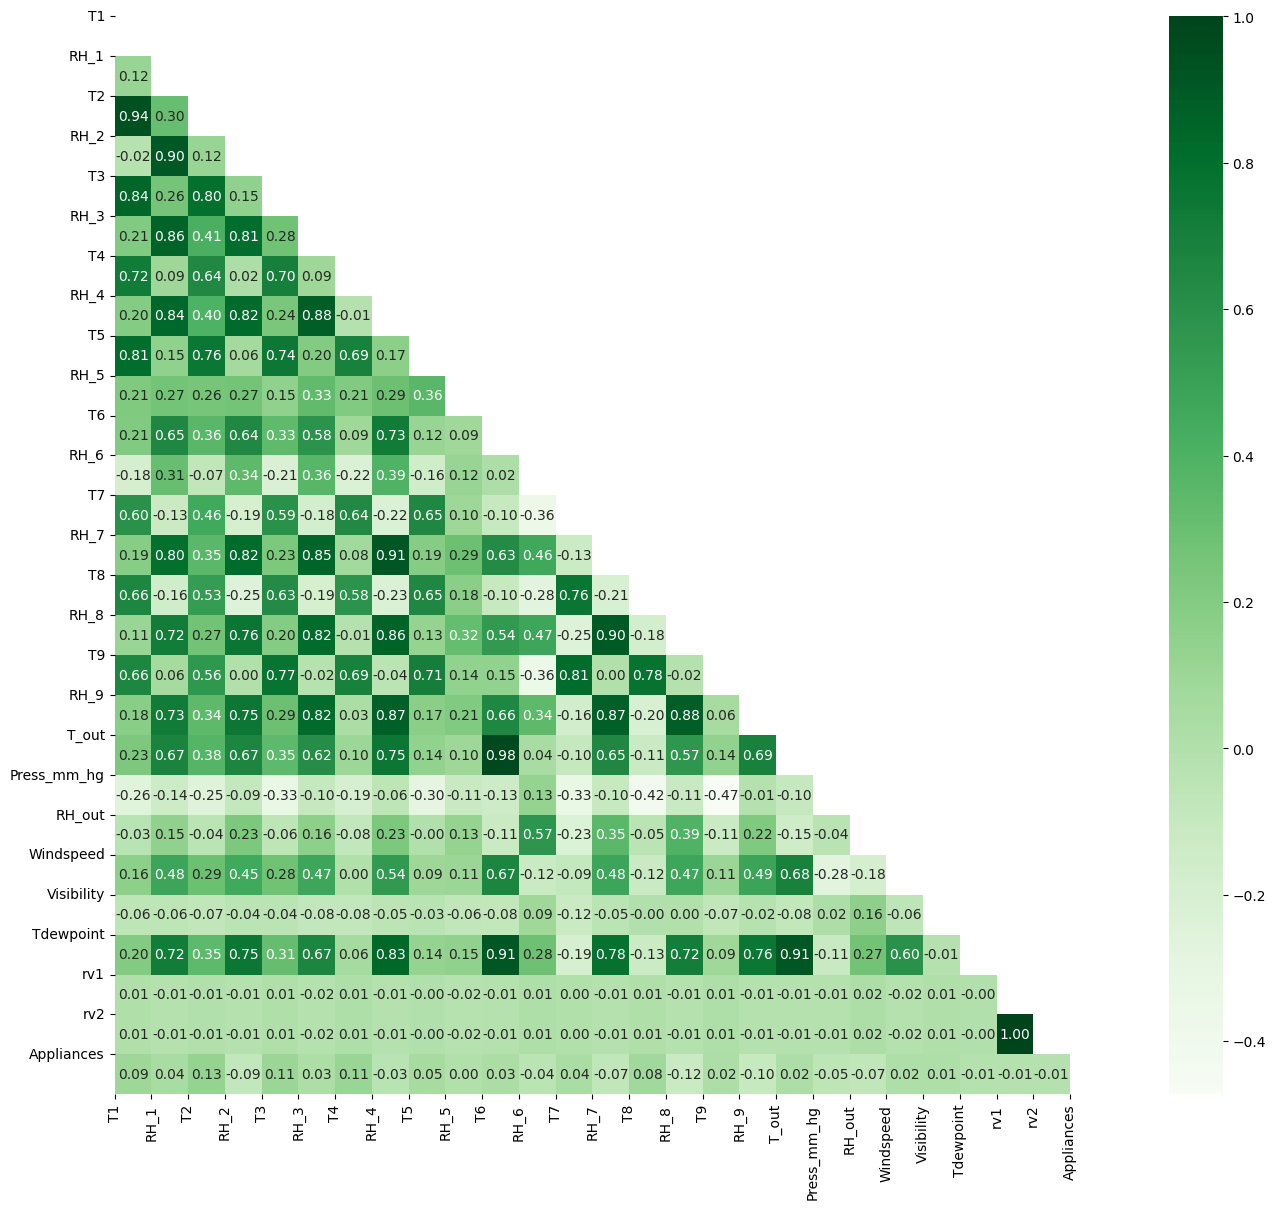

In [47]:
train_corr = train[cols_train_corr]
corr = train_corr.corr()

# Mask the repeated values
mask = np.zeros_like(
    corr,
    dtype = np.bool
)
mask[np.triu_indices_from(mask)] = True

# plotting via matplotlib
f, ax = pyplot.subplots(figsize=(16, 14))

# Generate Heat Map, allow annotations and place floats in map
heatmap(
    corr,
    annot = True,
    fmt = ".2f",
    mask = mask,
    cmap = "Greens"
)

# Apply xticks and yticks
pyplot.xticks(
    range(len(corr.columns)),
    corr.columns
)
pyplot.yticks(
    range(len(corr.columns)),
    corr.columns
)
pyplot.show()

## - anlayze boruta algorithm later for getting the importance of features

In [48]:
# Add in the future for filtering the features by importance

# 3. Preprocessing data

## - analysis key points
- **Temperature:**
    - 'T1-T9' and 'T_out' have positive correlation with 'Appliances'.
    - 'T6' and 'T_out' are both outdoor temperature statistics. So either of these ('T6') can be REMOVED.
    - 'T9' has very low value (0.01), so it can be REMOVED.
- **Humidity**
    - 'RH_1' and 'RH_3-RH_5' have positive correlation with 'Appliances'.
    - 'RH_2', 'RH_6-RH-9', and 'RH_out' have negative correlation with 'Appliances'.
    - 'RH_4' has very low value (0.01), so it can be REMOVED.
    - 'RH_5' has zero value, so it can be REMOVED.
- **Weather**
    - 'Tdewpoint' has very low value (0.01), so it can be REMOVED.
    - 'Visibility' has zero value, so it can be REMOVED.
- **Random variables**
    - 'rv1' and 'rv2' have very low value (-0.01), so both it can be REMOVED.

## - preparing train_X, train_Y, test_X, and test_Y

In [49]:
train_X = train[feature_vars.columns].copy(deep=True)
train_y = train[target_vars.columns].copy(deep=True)
test_X = test[feature_vars.columns].copy(deep=True)
test_y = test[target_vars.columns].copy(deep=True)

In [50]:
train_X.drop(
    ["date"],
    axis=1,
    inplace=True
)
test_X.drop(
    ["date"],
    axis=1,
    inplace=True
)

In [51]:
train_X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [52]:
test_X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,20.000000,38.900000,18.356667,39.730000,20.666667,37.290000,19.890000,35.7900,18.318571,45.400000,...,17.926667,41.096667,2.150000,755.000000,91.000000,1.0,58.500000,0.800000,25.187841,25.187841
1,20.033333,38.826667,18.426667,39.590000,20.600000,37.290000,19.823333,35.7300,18.327500,45.400000,...,18.000000,41.290000,2.333333,755.000000,90.000000,1.0,59.666667,0.833333,17.719998,17.719998
2,20.033333,38.766667,18.500000,39.530000,20.600000,37.290000,19.815000,35.7225,18.290000,45.400000,...,18.000000,41.060000,2.516667,755.000000,89.000000,1.0,60.833333,0.866667,9.685332,9.685332
3,20.000000,38.400000,18.500000,39.333333,20.600000,37.430000,19.856667,35.7600,18.290000,45.384286,...,18.000000,40.933333,2.700000,755.000000,88.000000,1.0,62.000000,0.900000,10.116246,10.116246
4,20.066667,38.260000,18.500000,39.126667,20.600000,37.363333,19.856667,35.7600,18.290000,45.334000,...,18.000000,40.600000,2.833333,754.933333,86.333333,1.0,55.000000,0.750000,12.069746,12.069746


## - dropping features based on above (correlation analysis) keypoints / analysis

In [53]:
train_X.drop(
    ["T6", "T9", "RH_4", "RH_5", "Tdewpoint", "Visibility", "rv1", "rv2"],
    axis = 1,
    inplace = True
)
test_X.drop(
    ["T6", "T9", "RH_4", "RH_5", "Tdewpoint", "Visibility", "rv1", "rv2"],
    axis = 1,
    inplace = True
)

In [54]:
train_X.head().round(2)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed
0,19.89,47.60,19.2,44.79,19.79,44.73,19.00,17.17,84.26,17.20,41.63,18.2,48.90,45.53,6.60,733.5,92.0,7.00
1,19.89,46.69,19.2,44.72,19.79,44.79,19.00,17.17,84.06,17.20,41.56,18.2,48.86,45.56,6.48,733.6,92.0,6.67
2,19.89,46.30,19.2,44.63,19.79,44.93,18.93,17.17,83.16,17.20,41.43,18.2,48.73,45.50,6.37,733.7,92.0,6.33
3,19.89,46.07,19.2,44.59,19.79,45.00,18.89,17.17,83.42,17.13,41.29,18.1,48.59,45.40,6.25,733.8,92.0,6.00
4,19.89,46.33,19.2,44.53,19.79,45.00,18.89,17.20,84.89,17.20,41.23,18.1,48.59,45.40,6.13,733.9,92.0,5.67


In [55]:
test_X.head().round(2)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed
0,20.00,38.90,18.36,39.73,20.67,37.29,19.89,18.32,84.83,18.70,34.00,20.1,40.86,41.10,2.15,755.00,91.00,1.0
1,20.03,38.83,18.43,39.59,20.60,37.29,19.82,18.33,84.50,18.70,33.79,20.1,41.06,41.29,2.33,755.00,90.00,1.0
2,20.03,38.77,18.50,39.53,20.60,37.29,19.82,18.29,84.19,18.70,33.70,20.1,41.09,41.06,2.52,755.00,89.00,1.0
3,20.00,38.40,18.50,39.33,20.60,37.43,19.86,18.29,83.86,18.70,33.57,20.1,41.09,40.93,2.70,755.00,88.00,1.0
4,20.07,38.26,18.50,39.13,20.60,37.36,19.86,18.29,82.50,18.63,33.40,20.0,40.90,40.60,2.83,754.93,86.33,1.0


In [56]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T1           6579 non-null   float64
 1   RH_1         6579 non-null   float64
 2   T2           6579 non-null   float64
 3   RH_2         6579 non-null   float64
 4   T3           6579 non-null   float64
 5   RH_3         6579 non-null   float64
 6   T4           6579 non-null   float64
 7   T5           6579 non-null   float64
 8   RH_6         6579 non-null   float64
 9   T7           6579 non-null   float64
 10  RH_7         6579 non-null   float64
 11  T8           6579 non-null   float64
 12  RH_8         6579 non-null   float64
 13  RH_9         6579 non-null   float64
 14  T_out        6579 non-null   float64
 15  Press_mm_hg  6579 non-null   float64
 16  RH_out       6579 non-null   float64
 17  Windspeed    6579 non-null   float64
dtypes: float64(18)
memory usage: 925.3 KB


# 4. Storing  Train_X, Train_y, Test_X, and Test_y data

## - storing train_X, train_Y, test_X, and test_Y

In [67]:
datetimenow = datetime.now()
file_hour   = str(datetimenow.hour).zfill(2)
file_minute = str(datetimenow.minute).zfill(2)
file_second = str(datetimenow.second).zfill(2)
file_store_data_prefix = "{:}_{:}_{:} ".format(file_hour, file_minute, file_second)
print ("\n\"{:}\" will be used as a prefix for the train_X, train_y, test_X, and test_y data filenames.\n".format(file_store_data_prefix))


"20_46_04 " will be used as a prefix for the train_X, train_y, test_X, and test_y data filenames.



In [68]:
# dataset_train_files
# dataset_train_features_files
# dataset_train_targets_files
# dataset_test_files

In [79]:
if (is_data_time_series):
    print ("\nDefined file names for time-series (ts)!\n")
    postfix_ts_nts = " ts"
    tmp_i = 1
    dataset_train_X_file = "{:}{:}02 a train_X{:}-{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts, tmp_i)
    dataset_train_y_file = "{:}{:}02 b train_y{:}-{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts, tmp_i)
    dataset_test_X_file  = "{:}{:}02 c test_X{:}-{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts, tmp_i)
    dataset_test_y_file  = "{:}{:}02 d test_y{:}-{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts, tmp_i)

    dataset_train_X_file_noprefix = "{:}02 a train_X{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
    dataset_train_y_file_noprefix = "{:}02 b train_y{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
    dataset_test_X_file_noprefix  = "{:}02 c test_X{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)
    dataset_test_y_file_noprefix  = "{:}02 d test_y{:}-{:}.csv".format(dataset_directory, postfix_ts_nts, tmp_i)

else:
    print ("\nDefined file names for non-time-series (nts)!\n")
    postfix_ts_nts = " nts"
    dataset_train_X_file = "{:}{:}02 a train_X{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts)
    dataset_train_y_file = "{:}{:}02 b train_y{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts)
    dataset_test_X_file  = "{:}{:}02 c test_X{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts)
    dataset_test_y_file  = "{:}{:}02 d test_y{:}.csv".format(dataset_directory_store, file_store_data_prefix, postfix_ts_nts)

    dataset_train_X_file_noprefix = "{:}02 a train_X{:}.csv".format(dataset_directory, postfix_ts_nts)
    dataset_train_y_file_noprefix = "{:}02 b train_y{:}.csv".format(dataset_directory, postfix_ts_nts)
    dataset_test_X_file_noprefix  = "{:}02 c test_X{:}.csv".format(dataset_directory, postfix_ts_nts)
    dataset_test_y_file_noprefix  = "{:}02 d test_y{:}.csv".format(dataset_directory, postfix_ts_nts)


Defined file names for time-series (ts)!



In [80]:
# dataset_train_file          = "{:}01 a train{:}.csv".format(dataset_directory, postfix_ts_nts)
# dataset_train_features_file = "{:}01 b train features{:}.csv".format(dataset_directory, postfix_ts_nts)
# dataset_train_targets_file  = "{:}01 c train targets{:}.csv".format(dataset_directory, postfix_ts_nts)
# dataset_test_file           = "{:}01 d test{:}.csv".format(dataset_directory, postfix_ts_nts)

In [81]:
# dataset_train_X_file = "{:}{:}02 a train_X.csv".format(dataset_directory_store, file_store_data_prefix)
# dataset_train_y_file = "{:}{:}02 b train_y.csv".format(dataset_directory_store, file_store_data_prefix)
# dataset_test_X_file  = "{:}{:}02 c test_X.csv".format(dataset_directory_store, file_store_data_prefix)
# dataset_test_y_file  = "{:}{:}02 d test_y.csv".format(dataset_directory_store, file_store_data_prefix)

# dataset_train_X_file_noprefix = "{:}02 a train_X.csv".format(dataset_directory)
# dataset_train_y_file_noprefix = "{:}02 b train_y.csv".format(dataset_directory)
# dataset_test_X_file_noprefix  = "{:}02 c test_X.csv".format(dataset_directory)
# dataset_test_y_file_noprefix  = "{:}02 d test_y.csv".format(dataset_directory)

In [82]:
train_X.to_csv(dataset_train_X_file, index=False)
train_y.to_csv(dataset_train_y_file, index=False)
test_X.to_csv(dataset_test_X_file, index=False)
test_y.to_csv(dataset_test_y_file, index=False)

train_X.to_csv(dataset_train_X_file_noprefix, index=False)
train_y.to_csv(dataset_train_y_file_noprefix, index=False)
test_X.to_csv(dataset_test_X_file_noprefix, index=False)
test_y.to_csv(dataset_test_y_file_noprefix, index=False)

## - verifying (all data)

### > verifying train_X data

In [83]:
train_X = read_csv(dataset_train_X_file_noprefix)

In [84]:
train_X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,17.166667,84.256667,17.200000,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,7.000000
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,17.166667,84.063333,17.200000,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,6.666667
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,17.166667,83.156667,17.200000,41.433333,18.2,48.730000,45.50,6.366667,733.7,92.0,6.333333
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,17.166667,83.423333,17.133333,41.290000,18.1,48.590000,45.40,6.250000,733.8,92.0,6.000000
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,17.200000,84.893333,17.200000,41.230000,18.1,48.590000,45.40,6.133333,733.9,92.0,5.666667


### > verifying train_X data

In [85]:
train_y = read_csv(dataset_train_y_file_noprefix)

In [86]:
train_y.head()

,Appliances
0,60
1,60
2,50
3,50
4,60


### > verifying test_X data

In [87]:
test_X = read_csv(dataset_test_X_file_noprefix)

In [88]:
test_X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed
0,20.000000,38.900000,18.356667,39.730000,20.666667,37.290000,19.890000,18.318571,84.830000,18.700000,33.997143,20.1,40.86,41.096667,2.150000,755.000000,91.000000,1.0
1,20.033333,38.826667,18.426667,39.590000,20.600000,37.290000,19.823333,18.327500,84.496667,18.700000,33.790000,20.1,41.06,41.290000,2.333333,755.000000,90.000000,1.0
2,20.033333,38.766667,18.500000,39.530000,20.600000,37.290000,19.815000,18.290000,84.190000,18.700000,33.697143,20.1,41.09,41.060000,2.516667,755.000000,89.000000,1.0
3,20.000000,38.400000,18.500000,39.333333,20.600000,37.430000,19.856667,18.290000,83.856667,18.700000,33.572000,20.1,41.09,40.933333,2.700000,755.000000,88.000000,1.0
4,20.066667,38.260000,18.500000,39.126667,20.600000,37.363333,19.856667,18.290000,82.500000,18.628571,33.397143,20.0,40.90,40.600000,2.833333,754.933333,86.333333,1.0


### > verifying test_X data

In [89]:
test_y = read_csv(dataset_test_y_file_noprefix)

In [90]:
test_y.head()

,Appliances
0,310
1,350
2,140
3,90
4,400
